<a href="https://colab.research.google.com/github/dannyjammooa/PHY-989-Final-Project/blob/main/GCM_excited.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import scipy.special as special
import math
import numpy.linalg as LA 
pi=np.pi

In [2]:
def fac(k,omega):
  n = k+omega/2
  o = omega
  return math.factorial(o)/(math.factorial(n)*math.factorial(o-n))

def N(t1,t2,omega):
  k = np.arange(-omega/2,omega/2+1,1)
  L = []
  for i in k:
    nn = (1/2**omega)*np.exp(-1j*i*t1)*fac(i,omega)*np.exp(1j*i*t2)
    L.append(nn)
  return sum(L)

def nk(k,omega):
  return ((2*pi)/(2**omega))*fac(k,omega)

def Ham2(t1,t2,chi,omega):
  A1 = np.cos((t1+t2)/2)/np.cos((t1-t2)/2)
  a2 = (1+np.sin((t1+t2)/2)**2)/np.cos((t1-t2)/2)**2
  A2 = a2-1
  H = -(omega/2)*N(t1,t2,omega)*(A1+(chi/2)*A2)
  return H

def integral(t1,t2,chi,omega,k1,k2):
  b1 = np.exp(1j*k1*t1)/np.sqrt(nk(k1,omega))
  b2 = np.exp(-1j*k2*t2)/np.sqrt(nk(k2,omega))
  return (b1*Ham2(t1,t2,chi,omega)*b2)/(2*pi)

def eigen(A):
    eigenValues, eigenVectors = LA.eig(A)
    idx = np.argsort(eigenValues)
    eigenValues = eigenValues[idx]
    eigenVectors = eigenVectors[:,idx]
    return eigenValues

In [3]:
chi = np.arange(0,2.1,0.1)
omega =6
k1 = np.arange(-omega/2,omega/2+1,1)
k2 = np.arange(-omega/2,omega/2+1,1)
HAM = []
for x in chi:
  mat = np.zeros((omega+1,omega+1))
  for i in range(len(k1)):
    for j in range(len(k2)):
      result = integrate.dblquad(integral,-pi,pi,lambda t1:-pi,lambda t1:pi,args=(x,omega,k1[i],k2[j]))
      mat[i][j] = result[0]
  HAM.append(mat)

/usr/local/lib/python3.7/dist-packages/scipy/integrate/quadpack.py:453: ComplexWarning: Casting complex values to real discards the imaginary part
  return _quadpack._qagse(func,a,b,args,full_output,epsabs,epsrel,limit)


In [4]:
e = [eigen(i) for i in HAM]
e1 = [e[i][0] for i in range(len(e))]
e2 = [e[i][1] for i in range(len(e))]
e3 = [e[i][2] for i in range(len(e))]
e4 = [e[i][3] for i in range(len(e))]
e5 = [e[i][4] for i in range(len(e))]
e6 = [e[i][5] for i in range(len(e))]
e7 = [e[i][6] for i in range(len(e))]

Text(0.5, 1.0, '$\\Omega=6$ GCM LM')

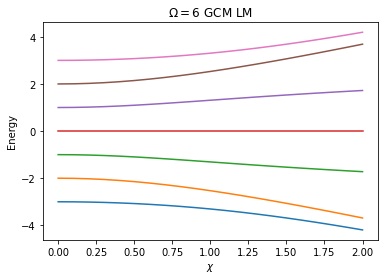

In [5]:
plt.plot(chi,e1)
plt.plot(chi,e2)
plt.plot(chi,e3)
plt.plot(chi,e4)
plt.plot(chi,e5)
plt.plot(chi,e6)
plt.plot(chi,e7)
plt.xlabel('$\chi$')
plt.ylabel('Energy')
plt.title('$\Omega=6$ GCM LM')